# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
housingData=pd.read_csv('cali-housing.csv')
# housingData
housingData = housingData.dropna(axis=0)

In [2]:
to_remove = [] 
for col in housingData.columns: 
    # Removing columns having only one value. 
    if housingData[col].nunique() == 1: 
        to_remove.append(col) 
  
    # Removing columns with more than 90% of the 
    # rows as null values. 
    elif (housingData[col].isnull()).mean() > 0.60: 
        to_remove.append(col) 
  
print(len(to_remove)) 

0


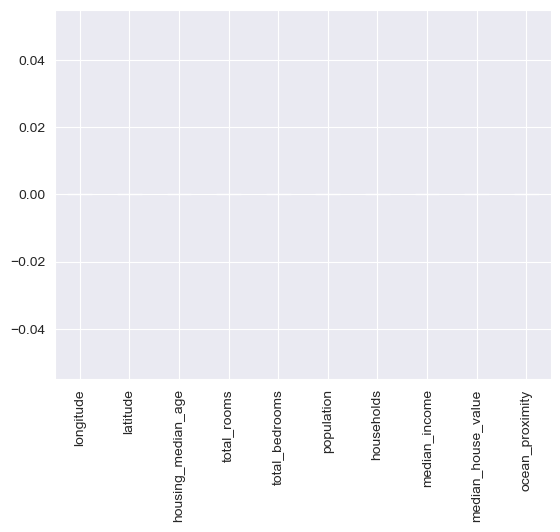

In [3]:
housingData.isnull().sum().plot.bar() 
plt.show() 


In [4]:
plt.figure(figsize=(20,20))
print(housingData.columns)
# housingData.drop('ocean_proximity',axis=1,inplace=True)
# housingData.corr()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


<Figure size 2000x2000 with 0 Axes>

In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

s = (housingData.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))
# housingData = housingData.drop(object_cols, axis=1)


Categorical variables:
['ocean_proximity']
No. of. categorical features:  1


In [6]:
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(housingData[object_cols]))
OH_cols.index = housingData.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = housingData.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)
# df_final = housingData
# StandardScaler().fit(df_final)

# X_train = StandardScaler().fit_transform(df_final)

In [7]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['median_house_value'], axis=1)
Y = df_final['median_house_value']
 
# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)


# SVM Model

In [8]:

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.5203589601280278


# Decision Tree 

In [9]:
from sklearn.tree import DecisionTreeRegressor
model_DTR = DecisionTreeRegressor()
model_DTR.fit(X_train, Y_train)
Y_pred = model_DTR.predict(X_valid)
mean_absolute_percentage_error(Y_valid, Y_pred)

0.23311366010754175

# Random Forest Regression  

In [10]:

from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
 
mean_absolute_percentage_error(Y_valid, Y_pred)

0.18109357556994965

# Linear Regression

0.2863160127801155


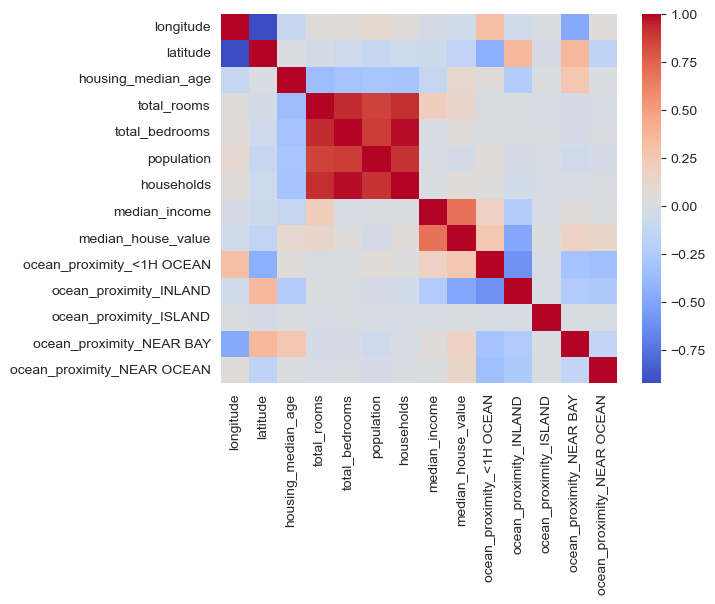

In [11]:

from sklearn.linear_model import LinearRegression
sns.heatmap(df_final.corr(), cmap='coolwarm')
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

# Cat Booster 

In [12]:
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid) 
 
cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score

Learning rate set to 0.063665
0:	learn: 111261.0933365	total: 59.4ms	remaining: 59.4s
1:	learn: 107448.4381291	total: 61.3ms	remaining: 30.6s
2:	learn: 103906.0755902	total: 63.1ms	remaining: 21s
3:	learn: 100624.3867283	total: 64.8ms	remaining: 16.1s
4:	learn: 97606.1240085	total: 66.5ms	remaining: 13.2s
5:	learn: 94924.1921522	total: 68ms	remaining: 11.3s
6:	learn: 92308.7887226	total: 69.3ms	remaining: 9.83s
7:	learn: 90002.1419962	total: 70.7ms	remaining: 8.77s
8:	learn: 87935.3658529	total: 72.1ms	remaining: 7.94s
9:	learn: 85998.0234617	total: 74ms	remaining: 7.33s
10:	learn: 84151.7298314	total: 75.3ms	remaining: 6.77s
11:	learn: 82557.5725255	total: 76.9ms	remaining: 6.33s
12:	learn: 81084.4300189	total: 78.2ms	remaining: 5.94s
13:	learn: 79748.4810159	total: 79.7ms	remaining: 5.61s
14:	learn: 78465.1496495	total: 81.1ms	remaining: 5.32s
15:	learn: 77313.9449734	total: 82.2ms	remaining: 5.06s
16:	learn: 76235.5508909	total: 83.4ms	remaining: 4.82s
17:	learn: 75244.2933435	total

0.8424332702948196